# Proyecto: Predicción de Demanda Eléctrica en La Pampa (Invierno 2026)
La demanda eléctrica en invierno suele aumentar en La Pampa por:
- Uso de calefacción eléctrica
- Mayor consumo residencial nocturno
- Variaciones de temperatura extrema

Este proyecto utiliza datos históricos para predecir la demanda eléctrica diaria en invierno, aplicando un modelo de Machine Learning (Random Forest Regressor) en Python.

In [12]:
# 1. Acá importo todas las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# 2. Despues cargo el dataset y preparo las variables
file_path = 'data/dataset_energía_lapampa.csv'
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

In [14]:
# 3. Selecciono variables y entreno el modelo
# Defino las variables que se usarán como entrada para los modelos (mes, día de la semana y variables climáticas)
features = ['month', 'dayofweek', 'temp_min', 'temp_max', 'precipitation_mm', 'wind_speed_kmh', 'is_holiday']
X = df[features]
y = df['demand_mwh']
# Divido el dataset en entrenamiento y test para evaluar el desempeño
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables para la red neuronal (mejora el aprendizaje de la red)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Entreno el modelo Random Forest (árboles de decisión, robusto y fácil de interpretar)
modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)

# Entreno el modelo de red neuronal simple (puede capturar relaciones no lineales)
modelo_nn = Sequential()
modelo_nn.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
modelo_nn.add(Dense(8, activation='relu'))
modelo_nn.add(Dense(1))
modelo_nn.compile(optimizer='adam', loss='mse')
modelo_nn.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=32, verbose=0)

c:\Users\Rollorsson\Documents\PlatformIO\Projects\TP-Final Nicolas Gaspari\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


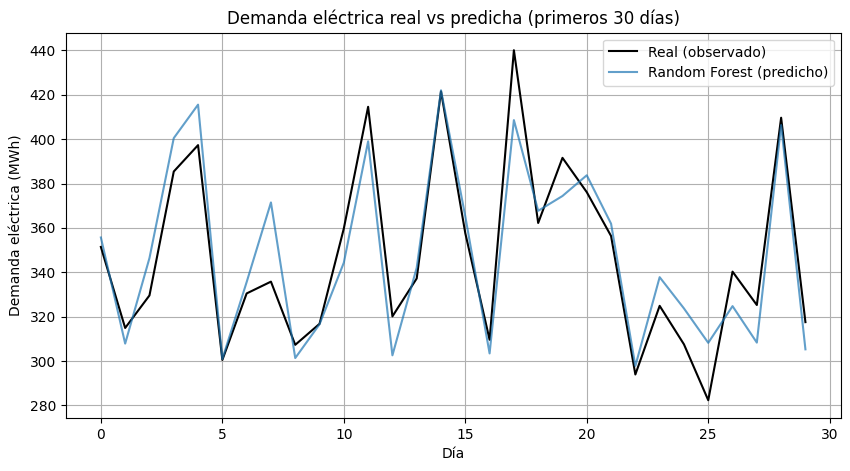

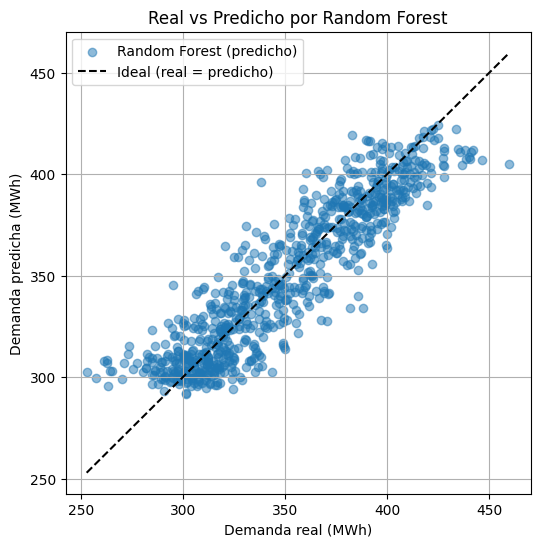

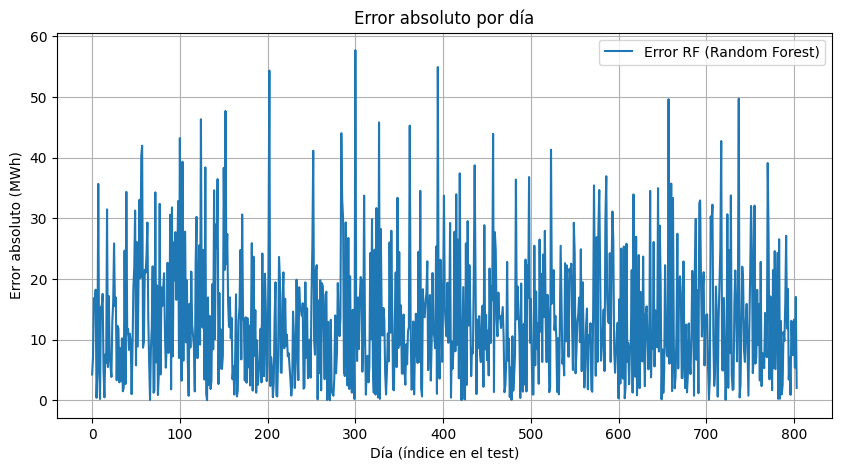

In [15]:
# Visualización clara para exposición: solo Random Forest
# 1. Zoom en los primeros 30 días del test
# Este gráfico muestra la demanda eléctrica real y la predicción del modelo Random Forest para los primeros 30 días del conjunto de test.
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:30], label='Real (observado)', color='black')
plt.plot(pred_rf[:30], label='Random Forest (predicho)', alpha=0.7)
plt.title('Demanda eléctrica real vs predicha (primeros 30 días)')
plt.xlabel('Día')
plt.ylabel('Demanda eléctrica (MWh)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Gráfico de dispersión: Real vs Predicho
# Este gráfico compara los valores reales de demanda eléctrica con los valores predichos por el modelo Random Forest.
# Si el modelo predice bien, los puntos estarán cerca de la línea diagonal "Ideal".
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_rf, alpha=0.5, label='Random Forest (predicho)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Ideal (real = predicho)')
plt.title('Real vs Predicho por Random Forest')
plt.xlabel('Demanda real (MWh)')
plt.ylabel('Demanda predicha (MWh)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Error absoluto por día
# Este gráfico muestra el error absoluto (diferencia en valor absoluto entre real y predicho) para cada día del test.
# Permite identificar en qué días el modelo se equivoca más.
error_rf = np.abs(y_test.values - pred_rf)
plt.figure(figsize=(10,5))
plt.plot(error_rf, label='Error RF (Random Forest)')
plt.title('Error absoluto por día')
plt.xlabel('Día (índice en el test)')
plt.ylabel('Error absoluto (MWh)')
plt.legend()
plt.grid(True)
plt.show()

### Descripción e interpretación de los gráficos
1. **Zoom en los primeros 30 días del test:**
   - Este gráfico permite observar con detalle cómo el modelo Random Forest predice la demanda eléctrica en los primeros días del conjunto de test. Se puede comparar visualmente la cercanía entre los valores reales y los predichos, identificando si el modelo sigue bien la tendencia.
2. **Gráfico de dispersión (Real vs Predicho):**
   - Aquí se compara cada valor real con su correspondiente predicción. Si el modelo es preciso, los puntos estarán cerca de la línea diagonal "Ideal". Una buena concentración de puntos cerca de esa línea indica buen desempeño.
3. **Error absoluto por día:**
   - Este gráfico muestra la diferencia absoluta entre la demanda real y la predicha por el modelo para cada día. Permite identificar los días en los que el modelo se equivoca más y analizar posibles causas de esos errores.